In [1]:
from tensorflow import keras as keras
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_path = "monkeys/training/training"
test_path = "monkeys/validation/validation"

names = ['Alouatta Palliata - Mantled Howler',
'Trythrocebus Patas - Patas Monkey',
'Cacajao Calvus - Bald Uakari',
'Macaca Fuscata - Japanese Macaque',
'Cebuella Pygmea - Pygmy Marmoset',
'Cebus Capucinus - White Headed Capuchin',
'Mico Argentatus - Silvery Marmoset',
'Saimiri Sciureus - Common Squirrel Monkey',
'Aotus Nigriceps - Black Headed Night Monkey',
'Trachypithecus Johnii - Nilgiri Langur']

size = 300
img_size = (size, size)
n_classes = 10

datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
    validation_split=0.2)

train_set = datagen.flow_from_directory(
                        train_path,
                         target_size = img_size,
                         batch_size=64,
                         seed = 42,
                         subset='training',
                         shuffle = True,
                         class_mode='categorical')

val_set = datagen.flow_from_directory(
                         train_path,
                         target_size = img_size,
                         batch_size=64,
                         seed = 42,
                         subset='validation',
                         shuffle = True,
                         class_mode='categorical')
                         

test_set = datagen.flow_from_directory(
                         test_path,
                         target_size = img_size,
                         batch_size = 64,
                         seed = 42,
                         class_mode = 'categorical',
                         shuffle = False)


Found 881 images belonging to 10 classes.
Found 217 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [3]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [4]:
model = keras.Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(size, size, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 165888)            0

In [9]:
model.fit(train_set, batch_size=16, epochs=100, verbose=1, validation_data=val_set)

Epoch 1/100
14/14 [==============================] - 37s 3s/step - loss: 2.3008 - accuracy: 0.1113 - val_loss: 2.3027 - val_accuracy: 0.1106
Epoch 2/100
14/14 [==============================] - 36s 3s/step - loss: 2.3008 - accuracy: 0.1113 - val_loss: 2.3027 - val_accuracy: 0.1106
Epoch 3/100
14/14 [==============================] - 36s 3s/step - loss: 2.2988 - accuracy: 0.1113 - val_loss: 2.3027 - val_accuracy: 0.1106
Epoch 4/100
14/14 [==============================] - 36s 3s/step - loss: 2.3027 - accuracy: 0.1113 - val_loss: 2.3027 - val_accuracy: 0.1106
Epoch 5/100
14/14 [==============================] - 36s 3s/step - loss: 2.3008 - accuracy: 0.1113 - val_loss: 2.3027 - val_accuracy: 0.1106
Epoch 6/100
14/14 [==============================] - 36s 3s/step - loss: 2.3008 - accuracy: 0.1113 - val_loss: 2.3027 - val_accuracy: 0.1106
Epoch 7/100
14/14 [==============================] - 36s 3s/step - loss: 2.2988 - accuracy: 0.1113 - val_loss: 2.3027 - val_accuracy: 0.1106
Epoch 8/100
1

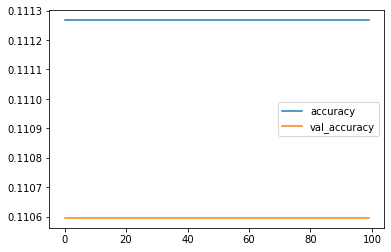

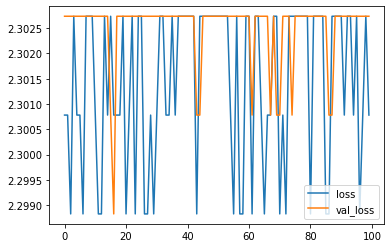

In [10]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()